## Decision Tree Basic

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# load dataset
play_data = pd.read_csv('./tennis.csv.txt')
play_data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


* A decision tree for above data

<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt4.PNG?raw=true" width="600px">

#### Criterion of creating Decision Tree
* Entropy - Objective of CART is to maximize information gain in each split
* Gini Impurity - If classes are mixed, gini impurity is maximul
##### Both the approaches, yields almost same results. We will discuss algorithm using Entropy


### Entropy of play
* Entropy(play) = – p(Yes) . log2p(Yes) – p(No) . log2p(No)

In [5]:
play_data.play.value_counts()

yes    9
no     5
Name: play, dtype: int64

In [6]:
Entropy_Play = -(9/14)*np.log2(9/14) -(5/14)*np.log2(5/14)  #np.log2 를 계산하는데 사용

In [7]:
Entropy_Play

0.9402859586706311

### Information Gain
* The information gain is based on the decrease in entropy after a dataset is split on an attribute. 
* Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).
* Gain(S, A) = Entropy(S) – ∑ [ p(S|A) . Entropy(S|A) ]
* We intend to choose the attribute, splitting by which information gain will be the most
* Next step is calculating information gain for all attributes

#### Information Gain on splitting by Outlook
* Gain(Play, Outlook) = Entropy(Play) – ∑ [ p(Play|Outlook) . Entropy(Play|Outlook) ]
* Gain(Play, Outlook) = Entropy(Play) – [ p(Play|Outlook=Sunny) . Entropy(Play|Outlook=Sunny) ] – [ p(Play|Outlook=Overcast) . Entropy(Play|Outlook=Overcast) ]  – [ p(Play|Outlook=Rain) . Entropy(Play|Outlook=Rain) ] 

In [8]:
play_data[play_data.outlook == 'sunny']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [9]:
# Entropy(Play|Outlook=Sunny)
Entropy_Play_Outlook_Sunny =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)

In [10]:
Entropy_Play_Outlook_Sunny

0.9709505944546686

In [11]:
play_data[play_data.outlook == 'overcast']

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


In [13]:
play_data[play_data.outlook == 'rainy']

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


In [14]:
# Entropy(Play|Outlook=rainy)
Entropy_Play_Outlook_Rain = -(2/5)*np.log2(2/5) - (3/5)*np.log2(3/5)

In [15]:
Entropy_Play_Outlook_Rain

0.9709505944546686

#### Information Gain on splitting by attribute outlook

In [16]:
#IG(Play, Outlook) = Entropy(Play) – [ p(Play|Outlook=Sunny) . Entropy(Play|Outlook=Sunny) ] – 
#[ p(Play|Outlook=Overcast) . Entropy(Play|Outlook=Overcast) ] – [ p(Play|Outlook=Rain) . Entropy(Play|Outlook=Rain) ]

Entropy_Play - (5/14)*Entropy_Play_Outlook_Sunny - (4/14)*0 - (5/14) * Entropy_Play_Outlook_Rain 

0.24674981977443933

#### Other gains
* Gain(Play, Temperature) - 0.029
* Gain(Play, Humidity) - 0.151
* Gain(Play, Wind) - 0.048

#### Conclusion - Outlook is winner & thus becomes root of the tree
<img src="https://i1.wp.com/sefiks.com/wp-content/uploads/2017/11/tree-v1.png?zoom=1.25&resize=728%2C252&ssl=1" width="600px">

### Time to find the next splitting criteria

In [17]:
play_data[play_data.outlook == 'overcast']

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


##### Conclusion - If outlook is overcast, play is true

### Let's find the next splitting feature

In [18]:
play_data[play_data.outlook == 'sunny']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [19]:
# Entropy(Play_Sunny|)
Entropy_Play_Outlook_Sunny =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)

In [20]:
Entropy_Play_Outlook_Sunny

0.9709505944546686

### Information Gain for humidity

In [21]:
#Entropy for attribute high = 0, also entropy for attribute normal = 0 
Entropy_Play_Outlook_Sunny - (3/5)*0 - (2/5)*0

0.9709505944546686

### Information Gain for windy
* False -> 3 -> [1+ 2-]
* True -> 2 -> [1+ 1-]

In [22]:
Entropy_Wind_False = -(1/3)*np.log2(1/3) - (2/3)*np.log2(2/3)

In [23]:
Entropy_Wind_False

0.9182958340544896

In [24]:
Entropy_Play_Outlook_Sunny - (3/5)* Entropy_Wind_False  - (2/5)*1 

0.01997309402197489

### Information Gain for temperature
* hot -> 2 -> [2- 0+]
* mild -> 2 -> [1+ 1-]
* cool -> 1  -> [1+ 0-]

In [25]:
Entropy_Play_Outlook_Sunny - (2/5)*0 - (1/5)*0 - (2/5)* 1

0.5709505944546686

#### Conclusion : Humidity is the best choice on sunny branch

<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt3.PNG?raw=true" width="600px">

In [26]:
play_data[(play_data.outlook == 'sunny') & (play_data.humidity == 'high')]

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no


In [27]:
play_data[(play_data.outlook == 'sunny') & (play_data.humidity == 'normal')]

,outlook,temp,humidity,windy,play
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


### Splitting the rainy branch

In [28]:
play_data[play_data.outlook == 'rainy']

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


In [29]:
# Entropy(Play_Rainy|)
Entropy_Play_Outlook_Rainy =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)

In [30]:
Entropy_Play_Outlook_Rainy

0.9709505944546686

### Information Gain for temp
* mild -> 3 [2+ 1-]
* cool -> 2 [1+ 1-]

In [31]:
Entropy_Play_Outlook_Rainy - (3/5)*0.918 - (2/5)*1

0.020150594454668602

### Information Gain for Windy

In [32]:
Entropy_Play_Outlook_Rainy - (2/5)*0 - (3/5)*0

0.9709505944546686

### Information Gain for Humidity
* High -> 2 -> [1+ 1-]
* Normal -> 3 -> [2+ 1-]

In [33]:
Entropy_Play_Outlook_Rainy_Normal = -(1/3)*np.log2(1/3) - (2/3)*np.log2(2/3)

In [34]:
Entropy_Play_Outlook_Rainy_Normal

0.9182958340544896

In [35]:
Entropy_Play_Outlook_Rainy - (2/5)*1 - (3/5)*Entropy_Play_Outlook_Rainy_Normal

0.01997309402197489

### Final Tree

<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt4.PNG?raw=true" width="600px">

### *Decision Tree for Classification*
* The leaf nodes of decision tree decides the class
* CART will convert features with continues values into categorical values
* Different tree will be generated with same data given in different order

In [59]:
# import packages
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, ExtraTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [37]:
# load dataset
iris = load_iris()

In [38]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [39]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [40]:
# define the classifier
dt = DecisionTreeClassifier(criterion='entropy') #불순도 측정 방식 입력

In [42]:
# train, test split
trainX, testX, trainY, testY = train_test_split(iris.data, iris.target) #4개

In [43]:
# classifier train
dt.fit(trainX,trainY) #학습데이터로 학습

DecisionTreeClassifier(criterion='entropy')

In [44]:
# export the visualized tree
export_graphviz(dt,'dt.tree') #원래이름, 지어주는 이름

### Visualizing the tree
* http://www.webgraphviz.com/

* Criteria - Entropy
<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt6.PNG?raw=true">

In [45]:
# predictions 예측
dt.predict(testX)

array([1, 0, 1, 0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2])

#### Feature Importances
* Important features will be higher up the tree
* We can use this techniques to identify important features

In [46]:
# features importance per variable 변수 영향도(엔트로피 기반)
dt.feature_importances_

array([0.01552364, 0.        , 0.06298289, 0.92149346])

#### Visualizing Decision Decision Boundry

In [48]:
# data generation 데이터 생성(여러가지 파라미터)
X, Y = make_blobs(n_features=2, n_samples=1000, cluster_std=.8, centers=4, random_state=6)

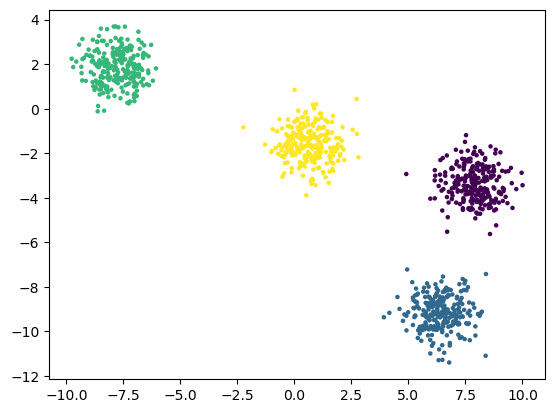

In [49]:
# visualize the generated data
plt.scatter(X[:,0],X[:,1],c=Y,s=5, cmap='viridis')
plt.show()

In [50]:
# define the classifier 참고용 코드
dt = DecisionTreeClassifier()

# model train 학습
dt.fit(X,Y)

DecisionTreeClassifier()

In [51]:
# visualize 시각적으로 표현
plot_step = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

In [52]:
# prediction
outcome = dt.predict(np.c_[xx.ravel(), yy.ravel()])

In [53]:
xx.shape

(86, 109)

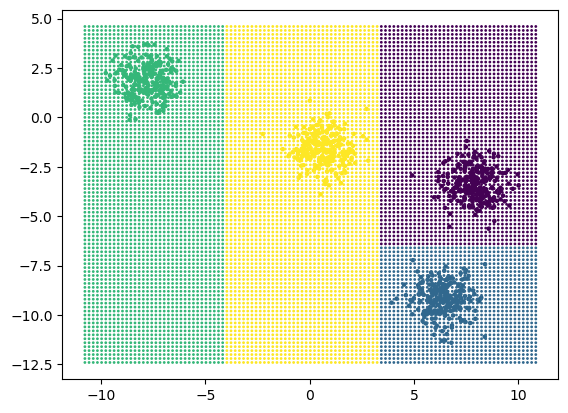

In [54]:
# visualize the result
plt.scatter(X[:,0],X[:,1],c=Y,s=5,cmap='viridis')
plt.scatter(xx.ravel(),yy.ravel(),c=outcome,s=1,alpha=1, cmap='viridis')
plt.show() #결과적으로 오분류된 경우가 없음

### *Decision Tree for Regression*
* Continues target is predicted with Tree.
* ID3 is modified for regression by replacing Information Gain with Mean Squared Error.
* Decision Tree tries to partition data into subsets of homogenous contents ( minimize mean squared error )

In [55]:
# import dataset
play_time = pd.read_csv('./tennis-time.csv.txt')
play_time

,outlook,temp,humidity,windy,time
0,sunny,hot,high,False,26
1,sunny,hot,high,True,30
2,overcast,hot,high,False,48
3,rainy,mild,high,False,46
4,rainy,cool,normal,False,62
5,rainy,cool,normal,True,23
6,overcast,cool,normal,True,43
7,sunny,mild,high,False,36
8,sunny,cool,normal,False,38
9,rainy,mild,normal,False,48


In [57]:
# label encoding 범주형 변수를 사용할 때 오류를 줄이기 위해
for col in ['outlook','temp','humidity','windy']:
    le = LabelEncoder()
    play_time[col] = le.fit_transform(play_time[col])

In [60]:
# regressor define 디폴트 평가지표가 MSE
dt = DecisionTreeRegressor() 

# regressor train
dt.fit(play_time.drop('time',axis=1), play_time.time) #time: y변수

DecisionTreeRegressor()

In [61]:
# export the visualized tree 노드 설정(루트, 리프, ...)
export_graphviz(dt,'regtree.dot',feature_names=['outlook','temp','humidity','windy'])

<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt8.PNG?raw=true">

In [64]:
# feature importance per variable 변수 영향도
dt.feature_importances_

array([0.46325729, 0.22271361, 0.14515689, 0.16887221])